<a href="https://colab.research.google.com/github/mhuckvale/pals0039/blob/master/Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear algebra in TensorFlow 2 
## Install tensorflow 2

In [0]:
!pip install -q tensorflow==2.0.0-alpha0 

## Import tensorflow

In [0]:
import tensorflow as tf
print('tensorflow',tf.__version__)
import numpy as np
print('numpy',np.__version__)
import pandas as pd
print('pandas',pd.__version__)


tensorflow 2.0.0-alpha0
numpy 1.16.2
pandas 0.24.2


## Utility functions

In [0]:
# create a matrix and store in form of tensor
def matcreate(lst):
  a=np.matrix(lst)
  return(tf.constant(lst,shape=a.shape,dtype='float64'))

# pretty print a matrix, converting tensors and scalars as required
def matprint(name,a):
  if (isinstance(a, tf.Tensor)):
    a=a.numpy();
  a=np.matrix(a)
  print(name+"("+("%d" %a.shape[0])+","+("%d" %a.shape[1])+"):")
  for i in range(a.shape[0]):
    for j in range(a.shape[1]):
      print("%6g" % a[i,j],end=' ');
    print()

## Create some sample matrices

In [0]:
v=matcreate([1,2,3])
matprint("v",v)
w=tf.transpose(v)
matprint("w",w)
A=tf.matmul(v,w)
matprint('A',A)
B=tf.matmul(w,v)
matprint('B',B)
d=tf.linalg.det(B)
matprint('det(B)',d)

v(1,3):
     1      2      3 
w(3,1):
     1 
     2 
     3 
A(1,1):
    14 
B(3,3):
     1      2      3 
     2      4      6 
     3      6      9 
det(B)(1,1):
     0 


## Matrix algebra

In [0]:
# create a 2x2 matrix
B=matcreate([[2,1],[3,4]])
matprint('B',B)
# find inverse
C=tf.linalg.inv(B)
matprint('C',C)
# multiply original by inverse
D=tf.matmul(B,C)
matprint('D',D)
# transpose and add
E=B+tf.transpose(B)
matprint('E',E)
# dot multiply
F=B*B
matprint('F',F)



B(2,2):
     2      1 
     3      4 
C(2,2):
   0.8   -0.2 
  -0.6    0.4 
D(2,2):
     1      0 
     0      1 
E(2,2):
     4      4 
     4      8 
F(2,2):
     4      1 
     9     16 


## Solve system of linear equations
Consider the following system of linear equations.

<pre>
3x<sub>1</sub> + x<sub>2</sub> = 3
9x<sub>1</sub> + 4x<sub>2</sub> = 6
</pre>

<p>We treat this as a matrix equation A.x = B

<p>Solution is: x<sub>1</sub> = 2 and x<sub>2</sub> = -3.

In [0]:
A=matcreate([[3,1],[9,4]]);
B=matcreate([[3],[6]]);
x=tf.linalg.solve(A,B)
matprint('A',A)
matprint('B',B)
matprint('x',x)


A(2,2):
     3      1 
     9      4 
B(2,1):
     3 
     6 
x(2,1):
     2 
    -3 


## Fit regression line using method of least squares

We generate some random data that approximates a straight line:
<pre>
y = B0 + B1 * x + random
</pre>
Then we fit a straight line to the data using the method of least squares to retrieve B0 and B1.



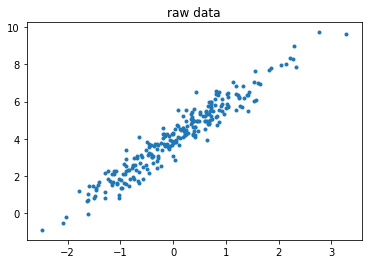

B(2,1):
3.97188 
1.93645 


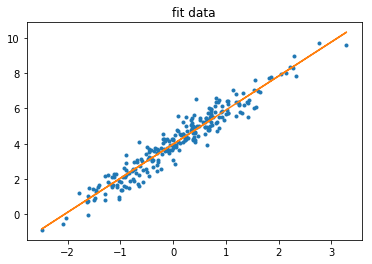

In [0]:
nobs=250
B0=4
B1=2
x=np.random.normal(size=(nobs,))
y=B0 + B1*x + np.random.normal(0.0,0.5,size=(nobs,))
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y,'.')
plt.title('raw data')
plt.show()
A=np.ones((nobs,2))
A[:,1]=x
A=matcreate(A)
Y=matcreate(y)
#B=tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(tf.transpose(A),A)),tf.transpose(A)),tf.transpose(Y))
B=tf.linalg.lstsq(A,tf.transpose(Y))
matprint('B',B)
pB0=B.numpy()[0]
pB1=B.numpy()[1]
py=pB0+pB1*x
plt.plot(x,y,'.',x, py,'-')
plt.title('fit data')
plt.show()
